# GT analysis sample

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from numpy.polynomial.polynomial import polyfit
import matplotlib.style as style 
from IPython.display import Image

import warnings
warnings.filterwarnings('ignore')

# define random jitter
def rjitt(arr):
    stdev = .01*(max(arr)-min(arr))
    return arr + np.random.randn(len(arr)) * stdev

# to set data path
# dataPath = 'https://raw.githubusercontent.com/stillxyxon/py_ml_analysis/master/'

# YONG's local data path
dataPath = 'C:/Users/user/Desktop/YONG/'




In [23]:
# test reading data
d1 = pd.read_csv(dataPath + 'nike_gt.csv')
d1.head()

,date,nikegt,adidasgt,pumagt
0,2004-01-01,35,16,11
1,2004-02-01,38,18,12
2,2004-03-01,44,20,14
3,2004-04-01,51,20,15
4,2004-05-01,47,20,14


In [34]:
d2 = pd.read_csv(dataPath + 'Nikesales.csv')
d2.columns = ['year', 'nikeRv', 'adidasRv', 'pumaRv']
d2['year'] = d2.year.astype(int)
d2.head()


,year,nikeRv,adidasRv,pumaRv
0,2006,13.44,10.08,2.76
1,2007,14.68,10.30,2.74
2,2008,16.74,10.80,2.77
3,2009,16.65,10.38,2.61
4,2010,16.47,11.99,2.86


In [25]:
d1['year'] = d1.date.str.slice(0,4)
d1

,date,nikegt,adidasgt,pumagt,year
0,2004-01-01,35,16,11,2004
1,2004-02-01,38,18,12,2004
2,2004-03-01,44,20,14,2004
3,2004-04-01,51,20,15,2004
4,2004-05-01,47,20,14,2004
...,...,...,...,...,...
185,2019-06-01,80,50,12,2019
186,2019-07-01,86,51,13,2019
187,2019-08-01,91,53,13,2019
188,2019-09-01,84,49,13,2019


In [35]:
d3 = d1[['nikegt','adidasgt','pumagt','year']].groupby('year').mean().reset_index()
d3['year'] = d3.year.astype(int)
d3

,year,nikegt,adidasgt,pumagt
0,2004,44.583333,19.416667,13.166667
1,2005,46.833333,21.833333,13.666667
2,2006,49.666667,23.333333,14.833333
3,2007,41.916667,20.833333,13.083333
4,2008,45.000000,21.916667,12.666667
5,2009,45.000000,22.750000,11.416667
6,2010,46.416667,25.166667,10.333333
7,2011,47.333333,25.416667,9.166667
8,2012,54.750000,26.500000,8.666667
9,2013,59.000000,26.250000,8.500000


In [51]:
d4 = d3.merge(d2, on='year', how='left')
d5 = d4[(d4.year>2005) & (d4.year<2019)]
d5


,year,nikegt,adidasgt,pumagt,nikeRv,adidasRv,pumaRv
2,2006,49.666667,23.333333,14.833333,13.44,10.08,2.76
3,2007,41.916667,20.833333,13.083333,14.68,10.30,2.74
4,2008,45.000000,21.916667,12.666667,16.74,10.80,2.77
5,2009,45.000000,22.750000,11.416667,16.65,10.38,2.61
6,2010,46.416667,25.166667,10.333333,16.47,11.99,2.86
7,2011,47.333333,25.416667,9.166667,18.08,13.32,3.17
8,2012,54.750000,26.500000,8.666667,20.97,14.88,3.27
9,2013,59.000000,26.250000,8.500000,22.75,14.20,2.99
10,2014,73.333333,31.083333,9.083333,24.99,14.53,2.97
11,2015,79.583333,40.250000,9.083333,27.51,16.92,3.39


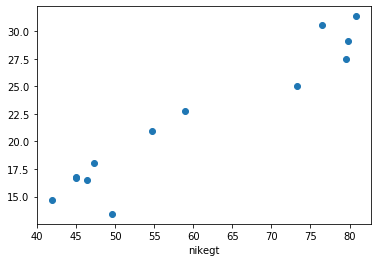

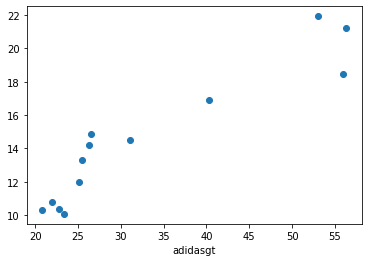

In [52]:
plt.scatter(d5.nikegt, d5.nikeRv)
plt.xlabel('nikegt')
plt.show()

plt.scatter(d5.adidasgt, d5.adidasRv)
plt.xlabel('adidasgt')
plt.show()


[0.57142857 0.58767014 0.60784314 0.61598224 0.57870696 0.57579618
 0.58493724 0.61569689 0.63233806 0.61917623 0.61160151 0.59026839
 0.58851136]


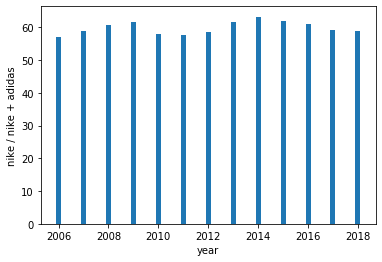

In [59]:
d5.relnikerev = d5.nikeRv / (d5.nikeRv + d5.adidasRv)
print(np.array(d5.relnikerev))

plt.bar(list(d5.year), d5.relnikerev*100, width=0.2)
plt.xlabel('year')
plt.ylabel('nike / nike + adidas')
plt.show()

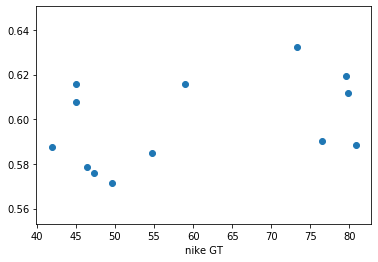

corr :  0.3998391616914662


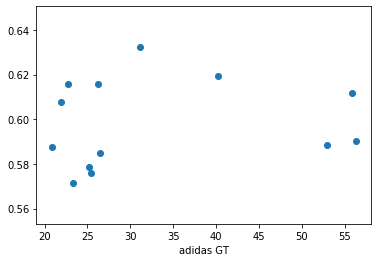

corr :  0.12757638409577438


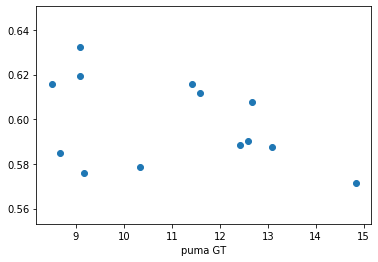

corr :  -0.3874215813986341


In [65]:
plt.scatter(d5.nikegt, d5.relnikerev)
plt.xlabel('nike GT')
plt.show()
print('corr : ', np.corrcoef(d5.nikegt, d5.relnikerev)[0,1])

plt.scatter(d5.adidasgt, d5.relnikerev)
plt.xlabel('adidas GT')
plt.show()
print('corr : ', np.corrcoef(d5.adidasgt, d5.relnikerev)[0,1])

plt.scatter(d5.pumagt, d5.relnikerev)
plt.xlabel('puma GT')
plt.show()
print('corr : ', np.corrcoef(d5.pumagt, d5.relnikerev)[0,1])


In [70]:
d6 = pd.read_csv(dataPath + 'nikeadid_qs.csv')
d6.columns = ['date','adidasrv', 'date_m1', 'nikerv']
d6

,date,adidasrv,date_m1,nikerv
0,2004-03-31,2028.0,2004-02-29,2904
1,2004-06-30,1696.0,2004-05-31,3487
2,2004-09-30,2388.0,2004-08-31,3562
3,2004-12-31,1860.0,2004-11-30,3148
4,2005-03-31,2333.0,2005-02-28,3308
...,...,...,...,...
58,2018-09-30,6829.0,2018-08-31,9948
59,2018-12-31,5959.0,2018-11-30,9374
60,2019-03-31,6682.0,2019-02-28,9611
61,2019-06-30,6192.0,2019-05-31,10184


In [78]:
d6['mnth'] = d6.date.str.slice(0,7)
d1['mnth'] = d1.date.str.slice(0,7)
d7 = d6.merge(d1, on='mnth', how='left')
d7 = d7.head(d7.shape[0]-1)
d7.head()

,date_x,adidasrv,date_m1,nikerv,mnth,date_y,nikegt,adidasgt,pumagt,year
0,2004-03-31,2028.0,2004-02-29,2904,2004-03,2004-03-01,44,20,14,2004
1,2004-06-30,1696.0,2004-05-31,3487,2004-06,2004-06-01,48,21,14,2004
2,2004-09-30,2388.0,2004-08-31,3562,2004-09,2004-09-01,44,19,14,2004
3,2004-12-31,1860.0,2004-11-30,3148,2004-12,2004-12-01,46,19,13,2004
4,2005-03-31,2333.0,2005-02-28,3308,2005-03,2005-03-01,50,25,15,2005


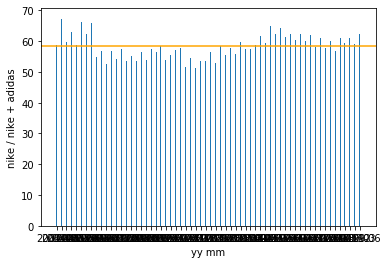

In [79]:
d7.relnikerev = d7.nikerv / (d7.nikerv + d7.adidasrv)
# print(np.array(d7.relnikerev))

plt.bar(list(d7.mnth), d7.relnikerev*100, width=0.2)
plt.xlabel('yy mm')
plt.ylabel('nike / nike + adidas')
plt.axhline((d7.relnikerev*100).mean(), color='orange')
plt.show()

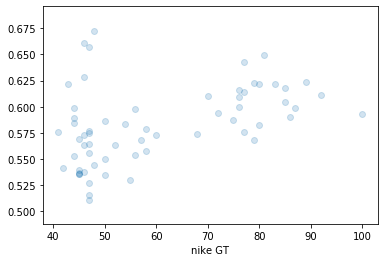

corr :  0.44814657213024334


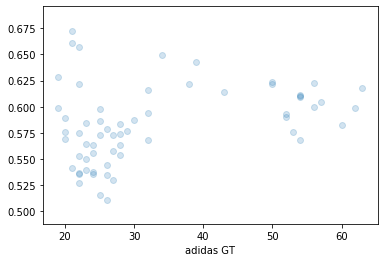

corr :  0.34181403514056474


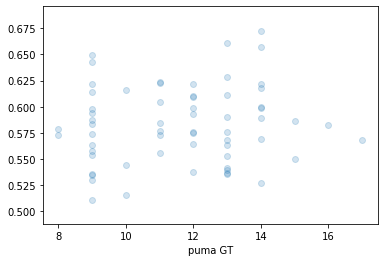

corr :  0.10805506568239154


In [80]:
plt.scatter(d7.nikegt, d7.relnikerev, alpha=0.2)
plt.xlabel('nike GT')
plt.show()
print('corr : ', np.corrcoef(d7.nikegt, d7.relnikerev)[0,1])

plt.scatter(d7.adidasgt, d7.relnikerev, alpha=0.2)
plt.xlabel('adidas GT')
plt.show()
print('corr : ', np.corrcoef(d7.adidasgt, d7.relnikerev)[0,1])

plt.scatter(d7.pumagt, d7.relnikerev, alpha=0.2)
plt.xlabel('puma GT')
plt.show()
print('corr : ', np.corrcoef(d7.pumagt, d7.relnikerev)[0,1])

- 나이키의 아디다스 대비 상대적 매출에 나이키에 대한 검색(관심)은 강한 긍정적 영향
- 아디다스 관심 역시 나이키 매출에 긍정 방향 영향
- 푸마 관심은 나이키 쪽에 영향 (아디다스와 경쟁관계? )

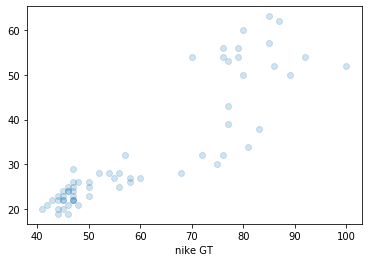

corr :  0.8910370122040558


In [81]:
plt.scatter(d7.nikegt, d7.adidasgt, alpha=0.2)
plt.xlabel('nike GT')
plt.show()
print('corr : ', np.corrcoef(d7.nikegt, d7.adidasgt)[0,1])

In [84]:
d7.to_csv(dataPath + 'd7.csv')


In [120]:
d8 = d7.rolling(3, min_periods=2).mean()
new_colnames = [x + 'p3MA' for x in d8.columns]
d8.columns = new_colnames 
d8 = d8.head(61).tail(60)
d8['mnth'] = np.array(d7.mnth[2:62])
d8

,adidasrvp3MA,nikervp3MA,nikegtp3MA,adidasgtp3MA,pumagtp3MA,mnth
1,1862.000000,3195.500000,46.000000,20.500000,14.000000,2004-09
2,2037.333333,3317.666667,45.333333,20.000000,14.000000,2004-12
3,1981.333333,3399.000000,46.000000,19.666667,13.666667,2005-03
4,2193.666667,3339.333333,46.666667,21.000000,14.000000,2005-06
5,2035.000000,3392.333333,47.333333,21.666667,13.666667,2005-09
6,2197.333333,3630.333333,46.333333,22.666667,14.000000,2005-12
7,2023.000000,3686.000000,45.333333,21.666667,13.666667,2006-03
8,2371.666667,3650.000000,46.666667,22.333333,14.333333,2006-06
9,2606.000000,3697.666667,51.333333,25.666667,15.333333,2006-09
10,3257.000000,3937.333333,51.333333,25.666667,15.333333,2006-12


In [106]:
d9 = d7.copy()
d9 = d9.tail(59)
d9

,date_x,adidasrv,date_m1,nikerv,mnth,date_y,nikegt,adidasgt,pumagt,year
3,2004-12-31,1860.0,2004-11-30,3148,2004-12,2004-12-01,46,19,13,2004
4,2005-03-31,2333.0,2005-02-28,3308,2005-03,2005-03-01,50,25,15,2005
5,2005-06-30,1912.0,2005-05-31,3721,2005-06,2005-06-01,46,21,13,2005
6,2005-09-30,2347.0,2005-08-31,3862,2005-09,2005-09-01,43,22,14,2005
7,2005-12-31,1810.0,2005-11-30,3475,2005-12,2005-12-01,47,22,14,2005
8,2006-03-31,2958.0,2006-02-28,3613,2006-03,2006-03-01,50,23,15,2006
9,2006-06-30,3050.0,2006-05-31,4005,2006-06,2006-06-01,57,32,17,2006
10,2006-09-30,3763.0,2006-08-31,4194,2006-09,2006-09-01,47,22,14,2006
11,2006-12-31,2900.0,2006-11-30,3822,2006-12,2006-12-01,45,20,14,2006
12,2007-03-31,3325.0,2007-02-28,3927,2007-03,2007-03-01,42,21,13,2007


In [121]:
d10 = d9.merge(d8, on='mnth', how='left')
d10

,date_x,adidasrv,date_m1,nikerv,mnth,date_y,nikegt,adidasgt,pumagt,year,adidasrvp3MA,nikervp3MA,nikegtp3MA,adidasgtp3MA,pumagtp3MA
0,2004-12-31,1860.0,2004-11-30,3148,2004-12,2004-12-01,46,19,13,2004,2037.333333,3317.666667,45.333333,20.000000,14.000000
1,2005-03-31,2333.0,2005-02-28,3308,2005-03,2005-03-01,50,25,15,2005,1981.333333,3399.000000,46.000000,19.666667,13.666667
2,2005-06-30,1912.0,2005-05-31,3721,2005-06,2005-06-01,46,21,13,2005,2193.666667,3339.333333,46.666667,21.000000,14.000000
3,2005-09-30,2347.0,2005-08-31,3862,2005-09,2005-09-01,43,22,14,2005,2035.000000,3392.333333,47.333333,21.666667,13.666667
4,2005-12-31,1810.0,2005-11-30,3475,2005-12,2005-12-01,47,22,14,2005,2197.333333,3630.333333,46.333333,22.666667,14.000000
5,2006-03-31,2958.0,2006-02-28,3613,2006-03,2006-03-01,50,23,15,2006,2023.000000,3686.000000,45.333333,21.666667,13.666667
6,2006-06-30,3050.0,2006-05-31,4005,2006-06,2006-06-01,57,32,17,2006,2371.666667,3650.000000,46.666667,22.333333,14.333333
7,2006-09-30,3763.0,2006-08-31,4194,2006-09,2006-09-01,47,22,14,2006,2606.000000,3697.666667,51.333333,25.666667,15.333333
8,2006-12-31,2900.0,2006-11-30,3822,2006-12,2006-12-01,45,20,14,2006,3257.000000,3937.333333,51.333333,25.666667,15.333333
9,2007-03-31,3325.0,2007-02-28,3927,2007-03,2007-03-01,42,21,13,2007,3237.666667,4007.000000,49.666667,24.666667,15.000000


In [122]:
d10.columns

Index(['date_x', 'adidasrv', 'date_m1', 'nikerv', 'mnth', 'date_y', 'nikegt',
       'adidasgt', 'pumagt', 'year', 'adidasrvp3MA', 'nikervp3MA',
       'nikegtp3MA', 'adidasgtp3MA', 'pumagtp3MA'],
      dtype='object')

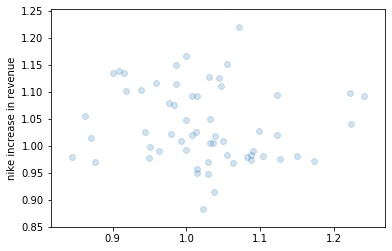

corr :  -0.10504920649649645


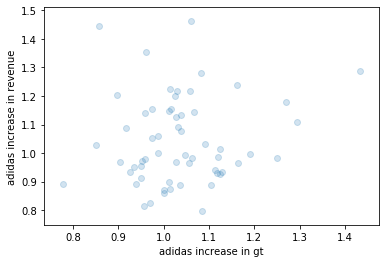

corr :  0.1202679481229629


In [133]:
d10['nikerv_mp3ma'] = d10.nikerv / d10.nikervp3MA
d10['nikegt_mp3ma'] = d10.nikegt / d10.nikegtp3MA

plt.scatter(d10.nikegt_mp3ma, d10.nikerv_mp3ma, alpha=0.2)
plt.ylabel('nike increase in gt')
plt.ylabel('nike increase in revenue')
plt.show()
print('corr : ', np.corrcoef(d10.nikegt_mp3ma, d10.nikerv_mp3ma)[0,1])

d10['adidasrv_mp3ma'] = d10.adidasrv / d10.adidasrvp3MA
d10['adidasgt_mp3ma'] = d10.adidasgt / d10.adidasgtp3MA

plt.scatter(d10.adidasgt_mp3ma, d10.adidasrv_mp3ma, alpha=0.2)
plt.xlabel('adidas increase in gt')
plt.ylabel('adidas increase in revenue')
plt.show()
print('corr : ', np.corrcoef(d10.adidasgt_mp3ma, d10.adidasrv_mp3ma)[0,1])

In [165]:
print(d10.shape)

# for X
d11 = d10.head(58)
d11.mnth = np.array(d10.mnth[1:])
# print(d11.mnth)
print(d11.tail())

# for Y
d12 = d10.tail(58)[['mnth','nikerv','adidasrv']]
d12.columns = ['mnth','tgt_nikerv','tgt_adidasrv']
d12.tail()

(59, 19)
        date_x  adidasrv     date_m1  nikerv     mnth      date_y  nikegt  \
53  2018-03-31    6820.0  2018-02-28    8984  2018-06  2018-03-01      79   
54  2018-06-30    6274.0  2018-05-31    9789  2018-09  2018-06-01      76   
55  2018-09-30    6829.0  2018-08-31    9948  2018-12  2018-09-01     100   
56  2018-12-31    5959.0  2018-11-30    9374  2019-03  2018-12-01      92   
57  2019-03-31    6682.0  2019-02-28    9611  2019-06  2019-03-01      86   

    adidasgt  pumagt  year  adidasrvp3MA   nikervp3MA  nikegtp3MA  \
53        54      13  2018   5979.666667  8767.000000   78.000000   
54        54      12  2018   6406.000000  8869.333333   81.000000   
55        52      12  2018   6273.333333  9109.000000   80.666667   
56        54      13  2018   6641.000000  9573.666667   85.000000   
57        52      13  2019   6354.000000  9703.666667   89.333333   

    adidasgtp3MA  pumagtp3MA  nikerv_mp3ma  nikegt_mp3ma  adidasrv_mp3ma  \
53     56.333333   12.000000      1.0

,mnth,tgt_nikerv,tgt_adidasrv
54,2018-06,9789,6274.0
55,2018-09,9948,6829.0
56,2018-12,9374,5959.0
57,2019-03,9611,6682.0
58,2019-06,10184,6192.0


In [238]:
print(d11.columns)
X = d11[['adidasrv', 'nikerv', 'nikegt',
       'adidasgt', 'pumagt', 'adidasrvp3MA', 'nikervp3MA',
       'nikegtp3MA', 'adidasgtp3MA', 'pumagtp3MA', 'nikerv_mp3ma',
       'nikegt_mp3ma', 'adidasrv_mp3ma', 'adidasgt_mp3ma']].tail(58).head(50)
Y = np.array(d12.tgt_nikerv)[1:51] - np.array(d12.tgt_nikerv)[:50]


Index(['date_x', 'adidasrv', 'date_m1', 'nikerv', 'mnth', 'date_y', 'nikegt',
       'adidasgt', 'pumagt', 'year', 'adidasrvp3MA', 'nikervp3MA',
       'nikegtp3MA', 'adidasgtp3MA', 'pumagtp3MA', 'nikerv_mp3ma',
       'nikegt_mp3ma', 'adidasrv_mp3ma', 'adidasgt_mp3ma'],
      dtype='object')


In [147]:
! pip install catboost

  Created wheel for retrying: filename=retrying-1.3.3-cp37-none-any.whl size=11435 sha256=3c90ed758fa84311b0b7c7e06ceee3a250459af4c97710b1474d99c96f063c1e
  Stored in directory: C:\Users\user\AppData\Local\pip\Cache\wheels\d7\a9\33\acc7b709e2a35caa7d4cae442f6fe6fbf2c43f80823d46460c
Successfully built retrying


In [239]:
from catboost import CatBoostRegressor

cbmodel = CatBoostRegressor(iterations=3000, learning_rate=0.01,
                            eval_metric='R2', # [ RMSE , R2 ]
                            loss_function='RMSE',
                            use_best_model=True,
                            random_seed=0,
                            metric_period = 20)

train_x = X
train_y = Y
print(train_x.shape)
print(len(Y))

cbmodel.fit(
    train_x, train_y,
    # cat_features=categorical_features_indices,
    # verbose=True,  # you can uncomment this for text output
    plot=True, # NOTE: does not work for classifier
    eval_set=(train_x, train_y)    
)


(50, 14)
50


0:	learn: 0.0040922	test: 0.0040922	best: 0.0040922 (0)	total: 2.69ms	remaining: 8.08s


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

20:	learn: 0.1091525	test: 0.1091525	best: 0.1091525 (20)	total: 106ms	remaining: 15s
40:	learn: 0.1965626	test: 0.1965626	best: 0.1965626 (40)	total: 166ms	remaining: 12s
60:	learn: 0.2721973	test: 0.2721973	best: 0.2721973 (60)	total: 194ms	remaining: 9.37s
80:	learn: 0.3447114	test: 0.3447114	best: 0.3447114 (80)	total: 237ms	remaining: 8.53s
100:	learn: 0.4072526	test: 0.4072526	best: 0.4072526 (100)	total: 272ms	remaining: 7.82s
120:	learn: 0.4684843	test: 0.4684843	best: 0.4684843 (120)	total: 304ms	remaining: 7.23s
140:	learn: 0.5151100	test: 0.5151100	best: 0.5151100 (140)	total: 331ms	remaining: 6.71s
160:	learn: 0.5577521	test: 0.5577521	best: 0.5577521 (160)	total: 359ms	remaining: 6.34s
180:	learn: 0.6002643	test: 0.6002643	best: 0.6002643 (180)	total: 399ms	remaining: 6.22s
200:	learn: 0.6371560	test: 0.6371560	best: 0.6371560 (200)	total: 424ms	remaining: 5.91s
220:	learn: 0.6683084	test: 0.6683084	best: 0.6683084 (220)	total: 460ms	remaining: 5.79s
240:	learn: 0.6999995	

<Figure size 432x288 with 0 Axes>

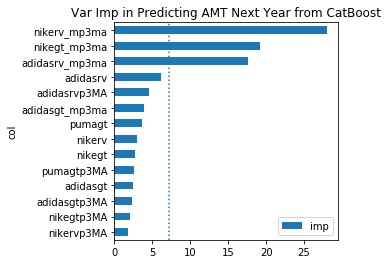

,imp,col,cum_sum_imp
10,28.03,nikerv_mp3ma,28.03
11,19.25,nikegt_mp3ma,47.28
12,17.65,adidasrv_mp3ma,64.93
0,6.11,adidasrv,71.04
5,4.56,adidasrvp3MA,75.60
13,3.91,adidasgt_mp3ma,79.51
4,3.69,pumagt,83.20
1,2.91,nikerv,86.11
2,2.75,nikegt,88.86
9,2.59,pumagtp3MA,91.45


In [240]:
# Mapping Feature Importance

plt.figure()
fea_imp = pd.DataFrame({'imp': cbmodel.feature_importances_, 'col': train_x.columns})
fea_imp['imp'] = round(fea_imp.imp, 2)
mean_vimp = fea_imp.imp.mean()
fea_imp = fea_imp.sort_values(['imp', 'col'], ascending=[True, False])
_ = fea_imp.plot(kind='barh', x='col', y='imp', figsize=(4, 4))
plt.title('Var Imp in Predicting AMT Next Year from CatBoost')
plt.axvline(mean_vimp, linestyle=':')
plt.show()

fea_imp1 = fea_imp.sort_values('imp', ascending=False)

# add row total
fea_imp1['cum_sum_imp']= round(fea_imp1['imp'].cumsum(),2)
fea_imp1.loc['row_total'] = fea_imp.apply(lambda x: x.sum())
fea_imp1

[ 393 -516  430  805  159 -574  237  573]


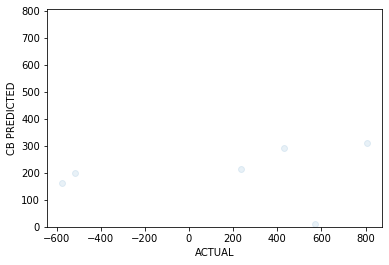

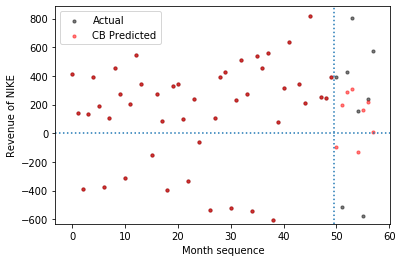

In [247]:
y_cb_pred = cbmodel.predict(d11[['adidasrv', 'nikerv', 'nikegt',
       'adidasgt', 'pumagt', 'adidasrvp3MA', 'nikervp3MA',
       'nikegtp3MA', 'adidasgtp3MA', 'pumagtp3MA', 'nikerv_mp3ma',
       'nikegt_mp3ma', 'adidasrv_mp3ma', 'adidasgt_mp3ma']].tail(58).tail(8))

test_y = np.array(d12.tgt_nikerv)[50:] - np.array(d12.tgt_nikerv)[49:][:8]
print(test_y)
plt.scatter(test_y, y_cb_pred, alpha=0.1)
plt.ylim(0,test_y.max())
plt.xlabel('ACTUAL')
plt.ylabel('CB PREDICTED')
plt.show()

# print(np.concatenate([1,2,3],[4,5,6]))

Y_actual = np.concatenate((np.array(train_y), np.array(test_y)))
Y_predicted = np.concatenate((np.array(train_y), np.array(y_cb_pred)))

plt.scatter(np.array(range(58)), Y_actual , s=10, alpha=0.5, color='black')
plt.scatter(np.array(range(58)), Y_predicted, s=10, alpha=0.5, color='red')
plt.ylim(min(test_y)*1.1,max(test_y)*1.1)
plt.xlabel('Month sequence')
plt.ylabel('Revenue of NIKE')
plt.legend(['Actual', 'CB Predicted'])
plt.axvline(49.5, linestyle=':')
plt.axhline(0, linestyle=':')
plt.show()